## Final Project Submission

Please fill out:
* Student name: Dennis Buxmann


## This part belongs still to the Presi and makes the analysis more impactful 

### 😎

In [1]:
%config InlineBackend.figure_format = 'png' 
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.random import normal
from scipy.stats import norm
from scipy import stats
from numpy.random import random_sample
import statsmodels.api as sms
import statsmodels.formula.api as smf
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
pd.options.display.float_format = '{:.0f}'.format
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import datetime

## Loading the data - DATA MINING
#### (Gather and scrape the data necessary for the project)

In [44]:
df = pd.read_csv('King_County_House_prices_dataset.csv')

#### Exploring basic data structure

In [45]:
df.shape

(21597, 21)

In [46]:
df.describe()

id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
count 21597      21597   21597     21597      21597        21597     21597     
mean  4580474288 540297  3         2          2080         15099     1         
std   2876735716 367368  1         1          918          41413     1         
min   1000102    78000   1         0          370          520       1         
25%   2123049175 322000  3         2          1430         5040      1         
50%   3904930410 450000  3         2          1910         7618      2         
75%   7308900490 645000  4         2          2550         10685     2         
max   9900000190 7700000 33        8          13540        1651359   4         

       waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
count 19221       21534 21597      21597  21597       21597     17755           
mean  0           0     3          8      1789        1971      84              
std   0           1     1          1      828         29        400             
min   0           0     1          3      370         1900      0               
25%   0           0     3          7      1190        1951      0               
50%   0           0     3          7      1560        1975      0               
75%   0           0     4          8      2210        1997      0               
max   1           4     5          13     9410        2015      2015            

       zipcode   lat  long  sqft_living15  sqft_lot15  
count 21597    21597 21597 21597          21597        
mean  98078    48    -122  1987           12758        
std   54       0     0     685            27274        
min   98001    47    -123  399            651          
25%   98033    47    -122  1490           5100         
50%   98065    48    -122  1840           7620         
75%   98118    48    -122  2360           10083        
max   98199    48    -121  6210           871200

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [48]:
df.tail(2)

id        date  price  bedrooms  bathrooms  sqft_living  \
21595  291310100   1/16/2015  400000  3        2           1600          
21596  1523300157  10/15/2014 325000  2        1           1020          

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21595  2388     2       nan         0      ...  8      1600         
21596  1076     2       0           0      ...  7      1020         

       sqft_basement yr_built  yr_renovated  zipcode  lat  long  \
21595  0.0            2004    0              98027   48   -122    
21596  0.0            2008    0              98144   48   -122    

       sqft_living15  sqft_lot15  
21595  1410           1287        
21596  1020           1357        

[2 rows x 21 columns]

## DATA CLEANING
#### (Fix the inconsistencies within the data and handle the missing data)

We start with identifying the missing data ('NAs'):

In [49]:
print(df.isnull().sum().sort_values(ascending=False))

yr_renovated     3842
waterfront       2376
view             63  
sqft_lot15       0   
date             0   
price            0   
bedrooms         0   
bathrooms        0   
sqft_living      0   
sqft_lot         0   
floors           0   
condition        0   
sqft_living15    0   
grade            0   
sqft_above       0   
sqft_basement    0   
yr_built         0   
zipcode          0   
lat              0   
long             0   
id               0   
dtype: int64


And take a closer look what proportion of single columns is not available from the dataset:

In [50]:
print(df.yr_renovated.isnull().sum() / df.shape[0])

0.17789507802009538


In [51]:
print(df.waterfront.isnull().sum() / df.shape[0])

0.11001527989998611


Summing all the NAs:

In [52]:
print(df.isnull().sum().sum())

6281


In [53]:
pd.set_option('display.max_colwidth', -1)

Then we fill zeros for abstent values:

In [54]:
df[['yr_renovated','waterfront', 'view']] = df[['yr_renovated','waterfront', 'view']].fillna(value=0)

...and check the result:

In [55]:
print(df.isnull().sum().sum())

0


Check for duplicate rows:

In [56]:
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


#### Next we focus on __outliers__:

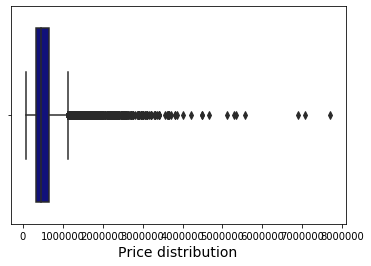

In [57]:
sns.boxplot(x=df['price'], color='darkblue')
plt.xlabel('Price distribution', fontsize=14)
plt.show()

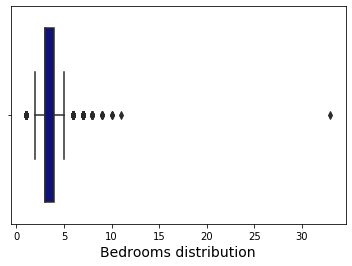

In [58]:
sns.boxplot(x=df['bedrooms'], color='darkblue')
plt.xlabel('Bedrooms distribution', fontsize=14)
plt.show()

To implement the Zscore (which eliminates the outliers), we need to have the relevant columns as __int__ or __float__ type, and not as object. From above line [7] we note that _sqft_basement_ is (unnecessary) set as __object__. Hence we convert it to __float__, firstly: 

In [59]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

And fill it with zeros for NAs:

In [60]:
df[['sqft_basement']] = df[['sqft_basement']].fillna(value=0)

Now we can exclude __object__ type columns to apply teh Zscore:

In [69]:
print ("shape before :", df.shape)
df_num = df.select_dtypes(exclude=['object'])
print ("shape after excluding object columns: ", df_num.shape)

shape before : (21597, 21)
shape after excluding object columns:  (21597, 20)


It also doesn't make sense to cut out outliers in some columns. So, we take them also out:

In [70]:
df_num = df_num.drop(['waterfront', 'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',], axis = 1)
df_num.tail()

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21592  263000018  360000  3        2           1530         1131       
21593  6600060120 400000  4        2           2310         5813       
21594  1523300141 402101  2        1           1020         1350       
21595  291310100  400000  3        2           1600         2388       
21596  1523300157 325000  2        1           1020         1076       

       sqft_above  sqft_basement  sqft_living15  sqft_lot15  
21592  1530       0               1530           1509        
21593  2310       0               1830           7200        
21594  1020       0               1020           2007        
21595  1600       0               1410           1287        
21596  1020       0               1020           1357

Then we apply Zscore which cuts the outliers out:

In [71]:
df_Zscore = df_num[(np.abs(stats.zscore(df_num))<3).all(axis=1)]
df_Zscore.shape

(20245, 10)

... and check on our features once more

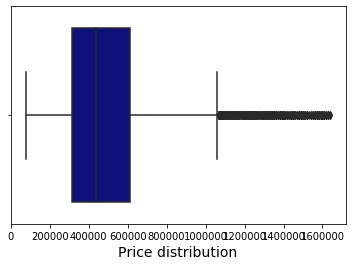

In [72]:
sns.boxplot(x=df_Zscore['price'], color='darkblue')
plt.xlabel('Price distribution', fontsize=14)
plt.show()

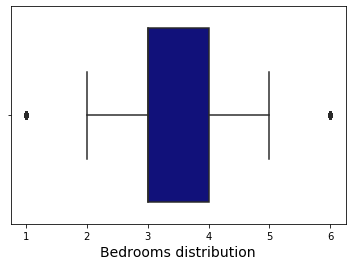

In [73]:
sns.boxplot(x=df_Zscore['bedrooms'], color='darkblue')
plt.xlabel('Bedrooms distribution', fontsize=14)
plt.show()

A brief check on our current dataframe:

In [74]:
df_Zscore.shape

(20245, 10)

Now we can insert back the previously eliminated variables:

In [75]:
df_Zscore.insert(loc = 1, column = 'date', value = df['date'])
df_Zscore.insert(loc = 7, column = 'yr_renovated', value = df['yr_renovated'])
df_Zscore.insert(loc = 8, column = 'waterfront', value = df['waterfront'])
df_Zscore.insert(loc = 9, column = 'floors', value = df['floors'])
df_Zscore.insert(loc = 10, column = 'view', value = df['view'])
df_Zscore.insert(loc = 11, column = 'condition', value = df['condition'])
df_Zscore.insert(loc = 12, column = 'grade', value = df['grade'])
df_Zscore.insert(loc = 6, column = 'yr_built', value = df['yr_built'])
df_Zscore.insert(loc = 18, column = 'zipcode', value = df['zipcode'])
df_Zscore.insert(loc = 19, column = 'lat', value = df['lat'])
df_Zscore.insert(loc = 20, column = 'long', value = df['long'])

Double-check the outcome...:

In [82]:
df_Zscore.head(1)

id        date  price  bedrooms  bathrooms  sqft_living  yr_built  \
0  7129300520  10/13/2014 221900  3        1           1180         1955       

   sqft_lot  yr_renovated  waterfront  ...  view  condition  grade  \
0  5650     0             0            ... 0      3          7       

   sqft_above  sqft_basement  sqft_living15  sqft_lot15  zipcode  lat  long  
0  1180       0               1340           5650        98178   48   -122   

[1 rows x 21 columns]

...and rename-back the dataframe:

In [78]:
df = df_Zscore

#### Next we check for multicollinearity among the variables:

and build this awesome heat-map to see what is correlated with each other:

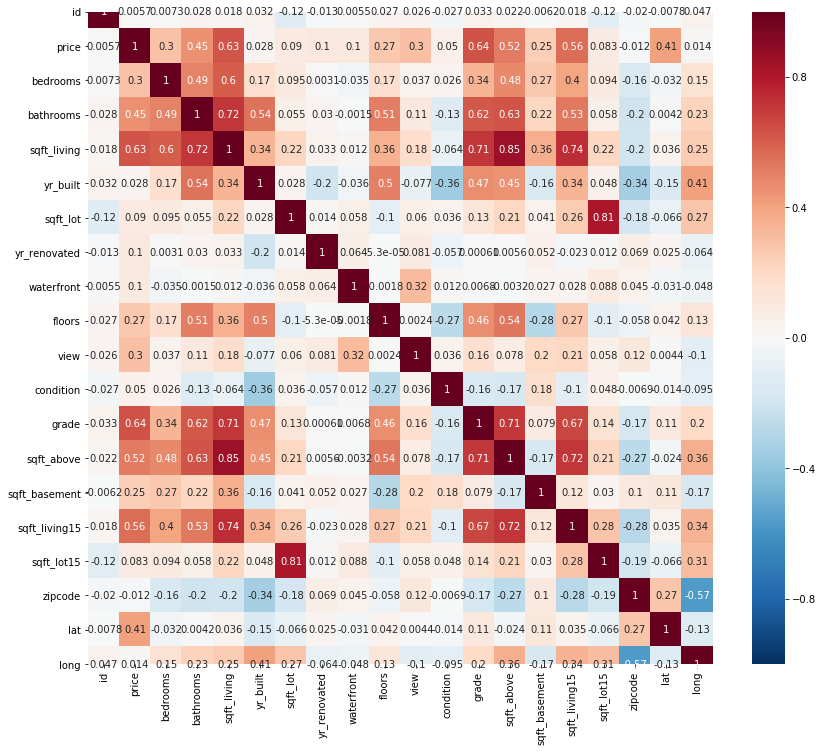

In [83]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

As nice as it is, the heatmap is quite difficult to read. Hence we build the bolow table, which indicates all the correlations above 0.8 (which was chosen more or less arbitrarily):

In [80]:
abs(df.corr()) > 0.8

id  price  bedrooms  bathrooms  sqft_living  yr_built  \
id             True   False  False     False      False        False      
price          False  True   False     False      False        False      
bedrooms       False  False  True      False      False        False      
bathrooms      False  False  False     True       False        False      
sqft_living    False  False  False     False      True         False      
yr_built       False  False  False     False      False        True       
sqft_lot       False  False  False     False      False        False      
yr_renovated   False  False  False     False      False        False      
waterfront     False  False  False     False      False        False      
floors         False  False  False     False      False        False      
view           False  False  False     False      False        False      
condition      False  False  False     False      False        False      
grade          False  False  False     False      False        False      
sqft_above     False  False  False     False      True         False      
sqft_basement  False  False  False     False      False        False      
sqft_living15  False  False  False     False      False        False      
sqft_lot15     False  False  False     False      False        False      
zipcode        False  False  False     False      False        False      
lat            False  False  False     False      False        False      
long           False  False  False     False      False        False      

               sqft_lot  yr_renovated  waterfront  floors   view  condition  \
id             False     False         False       False   False  False       
price          False     False         False       False   False  False       
bedrooms       False     False         False       False   False  False       
bathrooms      False     False         False       False   False  False       
sqft_living    False     False         False       False   False  False       
yr_built       False     False         False       False   False  False       
sqft_lot       True      False         False       False   False  False       
yr_renovated   False     True          False       False   False  False       
waterfront     False     False         True        False   False  False       
floors         False     False         False       True    False  False       
view           False     False         False       False   True   False       
condition      False     False         False       False   False  True        
grade          False     False         False       False   False  False       
sqft_above     False     False         False       False   False  False       
sqft_basement  False     False         False       False   False  False       
sqft_living15  False     False         False       False   False  False       
sqft_lot15     True      False         False       False   False  False       
zipcode        False     False         False       False   False  False       
lat            False     False         False       False   False  False       
long           False     False         False       False   False  False       

               grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
id             False  False       False          False          False        
price          False  False       False          False          False        
bedrooms       False  False       False          False          False        
bathrooms      False  False       False          False          False        
sqft_living    False  True        False          False          False        
yr_built       False  False       False          False          False        
sqft_lot       False  False       False          False          True         
yr_renovated   False  False       False          False          False        
waterfront     False  False       False          False          False        
fl

As can be obeserved from the table - _sqft_above_ and _sqft_living_ exhibit correlation in excess of 0.8 and can consequently be eliminated from the dataset:

In [84]:
df = df.drop('sqft_above', axis = 1)

just to be sure, we take a look on our df:

In [86]:
df.head(1)

id        date  price  bedrooms  bathrooms  sqft_living  yr_built  \
0  7129300520  10/13/2014 221900  3        1           1180         1955       

   sqft_lot  yr_renovated  waterfront  floors  view  condition  grade  \
0  5650     0             0           1       0      3          7       

   sqft_basement  sqft_living15  sqft_lot15  zipcode  lat  long  
0 0               1340           5650        98178   48   -122

What should have been done next is normalization of two highly skewed variables _price_ and _sqft_living_. For the chosen business case this step was disadvantageous and was hence not made.

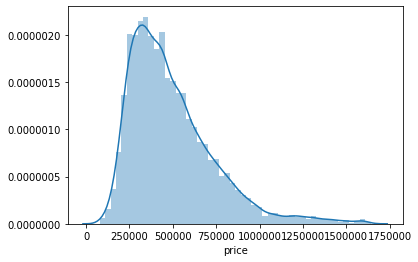

In [87]:
sns.distplot(df.price)

In [ ]:
#df.price = np.log(df.price)
#sns.distplot(df.price)

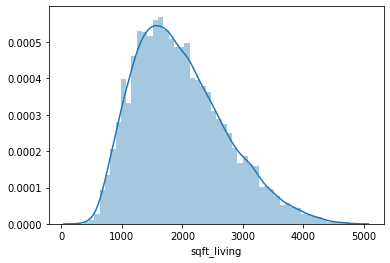

In [88]:
sns.distplot(df.sqft_living)

In [ ]:
#df.sqft_living = np.log(df.sqft_living)
#sns.distplot(df.sqft_living)

## DATA EXPLORATION
#### (Forming hypotheses about the defined problem by visually analyzing the data)

Firstly, we take a look on what is mostly related to the price - which is our dependent variable:

In [90]:
df.corr()['price'].sort_values(ascending=False)

price           1 
grade           1 
sqft_living     1 
sqft_living15   1 
bathrooms       0 
lat             0 
view            0 
bedrooms        0 
floors          0 
sqft_basement   0 
yr_renovated    0 
waterfront      0 
sqft_lot        0 
sqft_lot15      0 
condition       0 
yr_built        0 
long            0 
id              0 
zipcode         -0
Name: price, dtype: float64

In [92]:
df.head(1)

id        date  price  bedrooms  bathrooms  sqft_living  yr_built  \
0  7129300520  10/13/2014 221900  3        1           1180         1955       

   sqft_lot  yr_renovated  waterfront  floors  view  condition  grade  \
0  5650     0             0           1       0      3          7       

   sqft_basement  sqft_living15  sqft_lot15  zipcode  lat  long  
0 0               1340           5650        98178   48   -122

A rather unhelpful overview of relations between the variables:

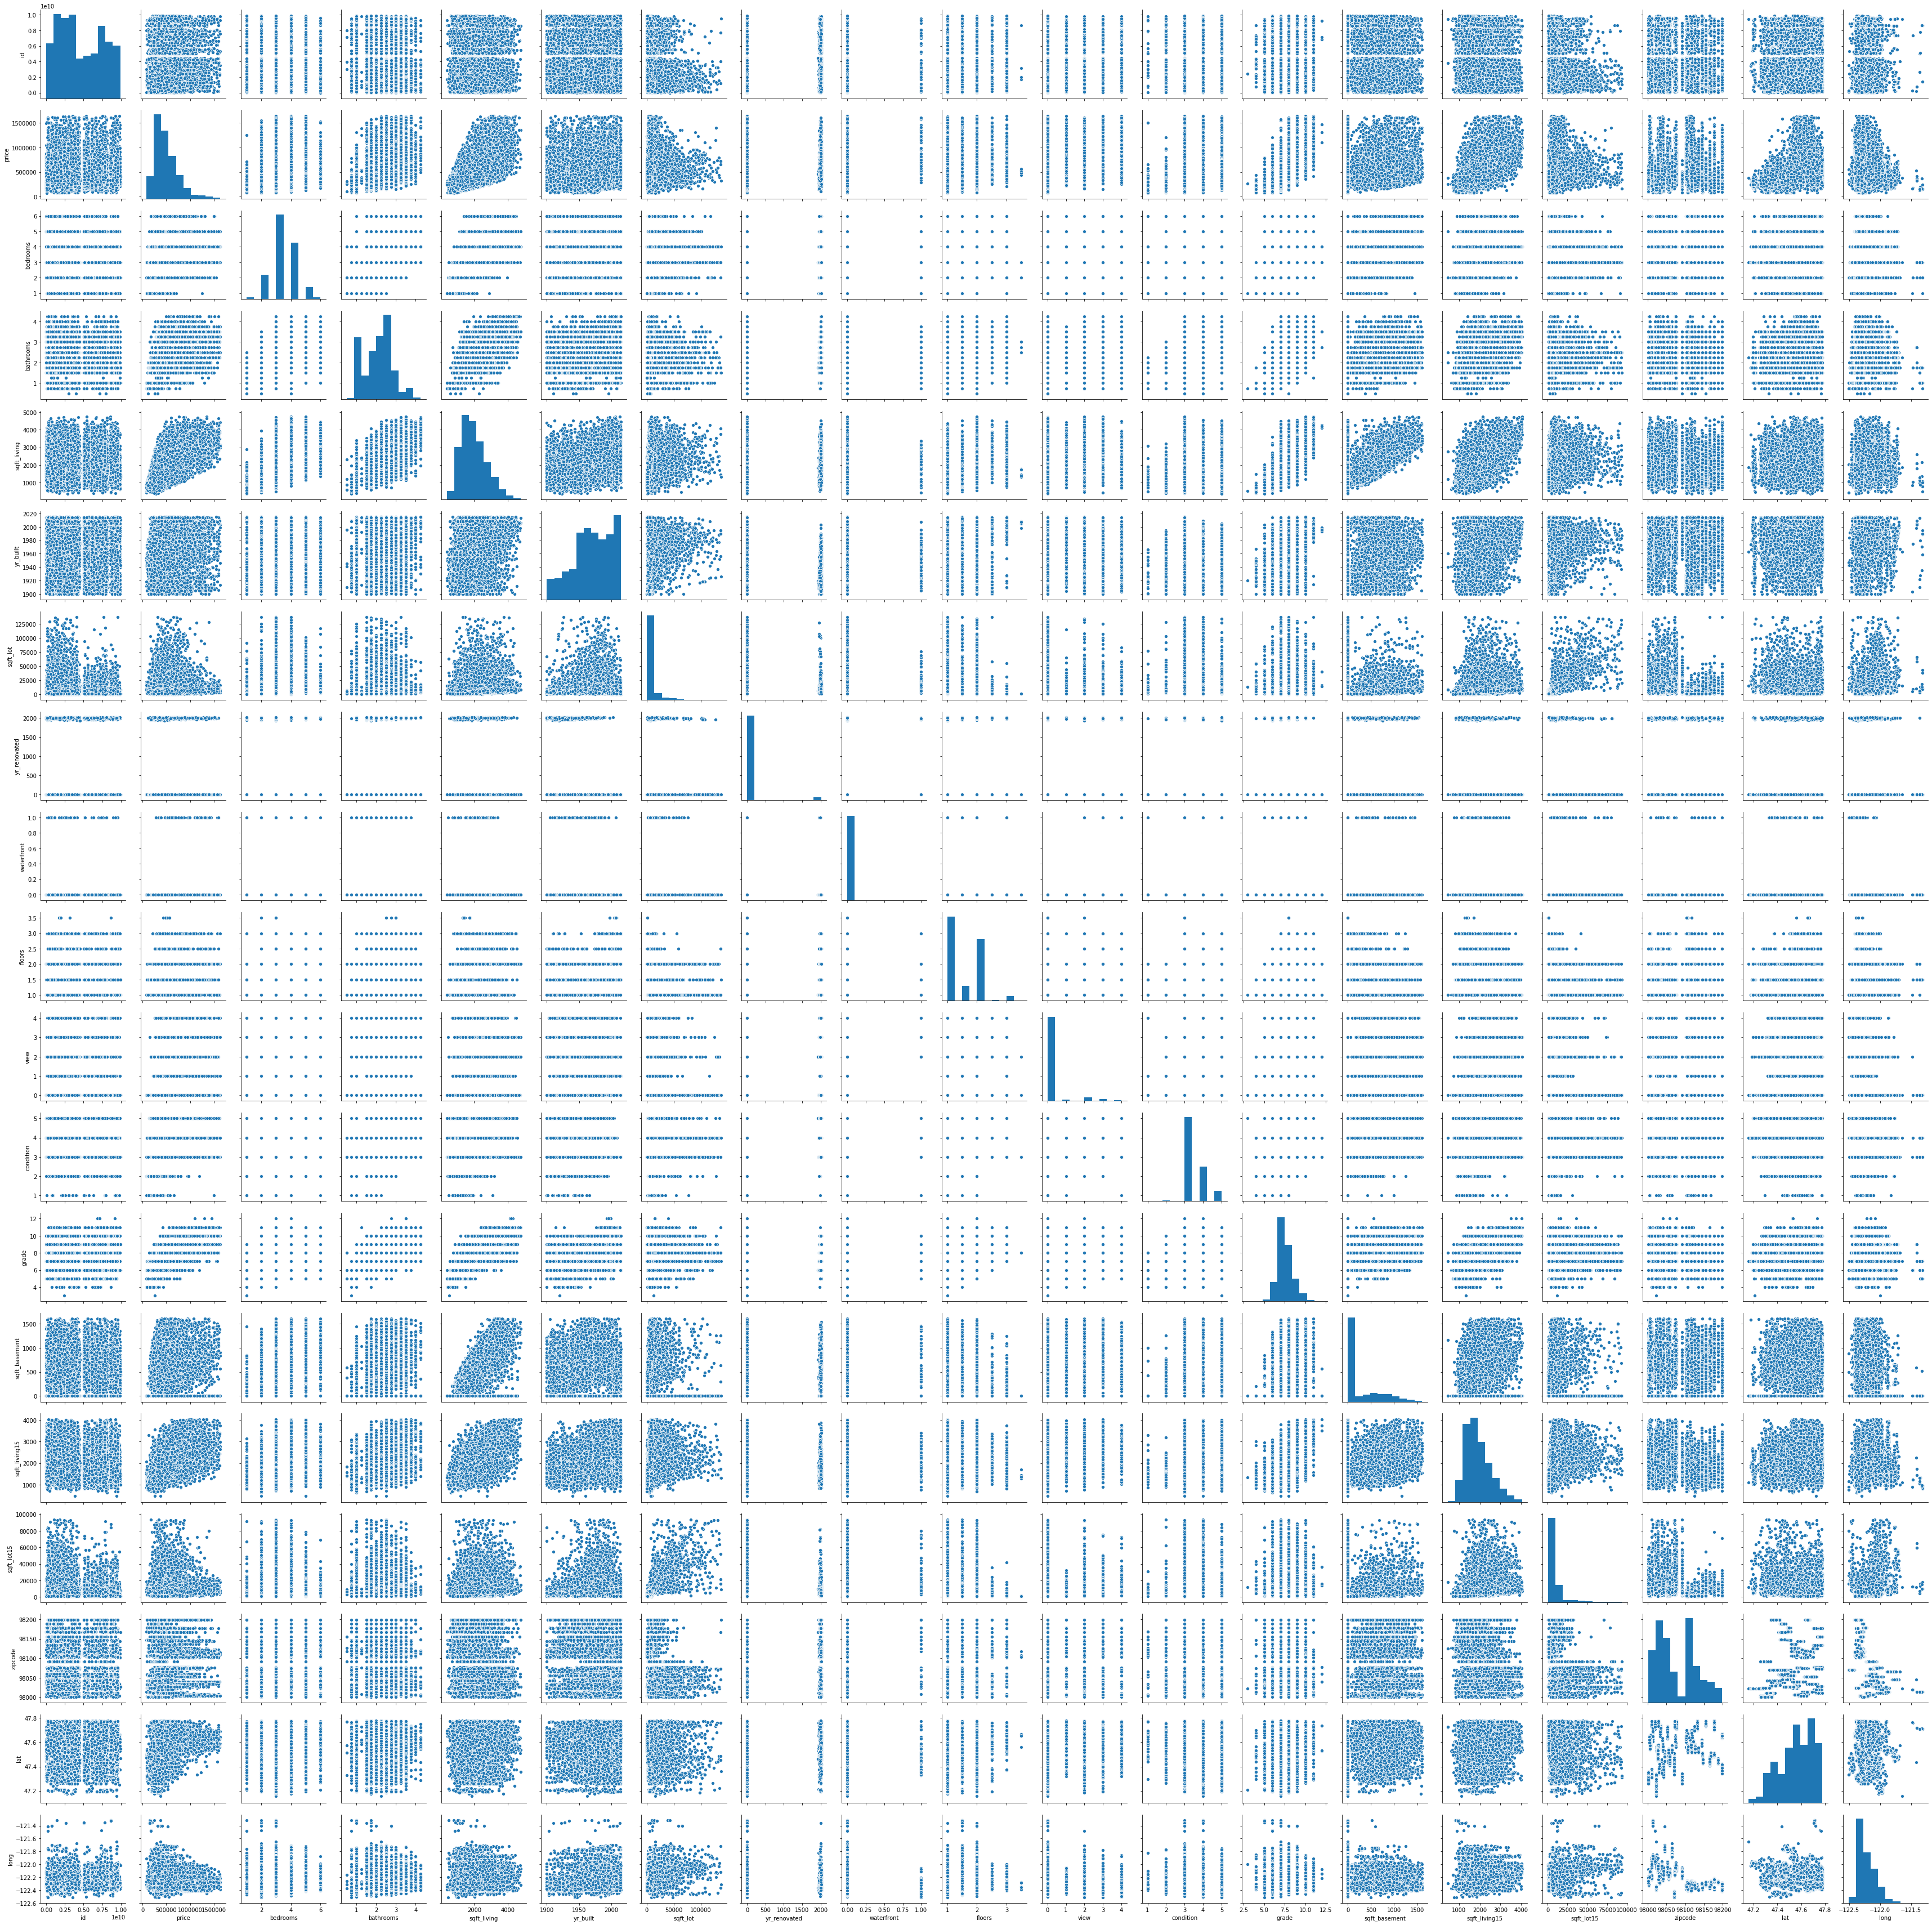

In [93]:
#sns.pairplot(df)

Then we pack all the variables in a list:

In [98]:
explanatory_vars = list(df.columns)
explanatory_vars = [e for e in explanatory_vars]
explanatory_vars

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'yr_built',
 'sqft_lot',
 'yr_renovated',
 'waterfront',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'zipcode',
 'lat',
 'long']

And estimate the explanatory power of a single variable in _price_ :

In [97]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
id      	 	= 3.26e-05
date    	 	= 0.0236
price   	 	= 1.0
bedrooms 	 	= 0.0878
bathrooms 	 	= 0.206
sqft_living 	 	= 0.393
yr_built 	 	= 0.000799
sqft_lot 	 	= 0.00816
yr_renovated 	 	= 0.0107
waterfront 	 	= 0.0101
floors  	 	= 0.0729
view    	 	= 0.0892
condition 	 	= 0.0025
grade   	 	= 0.407
sqft_basement 	 	= 0.0623
sqft_living15 	 	= 0.309
sqft_lot15 	 	= 0.00693
zipcode 	 	= 0.000134
lat     	 	= 0.168
long    	 	= 0.000205


Several varaibles exlain higher portion of variation in _price_. We examine thier correlation with _price_ one more time:

Unsurprisingly _sqft_living_ is highly correlated with _price_ :

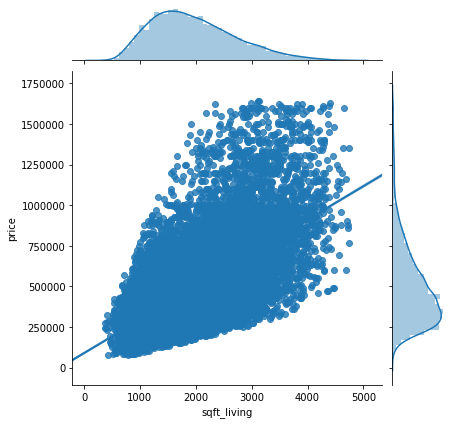

In [101]:
sns.jointplot(df['sqft_living'], 'price', data=df, kind='reg')

Latitude is also correlated with price, which can be explain by geographical position of a real estate location with respect to Lake Washington and Elliot Bay.

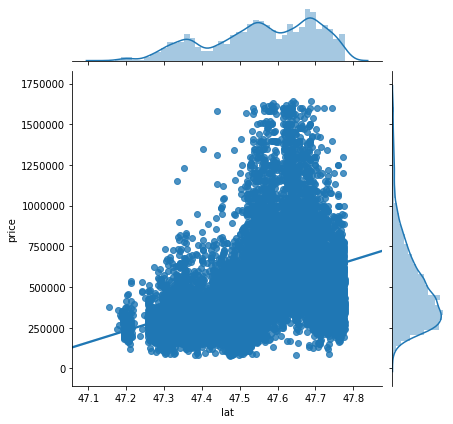

In [102]:
sns.jointplot(df['lat'], 'price', data=df, kind='reg')

Obvious relation between price and grade:

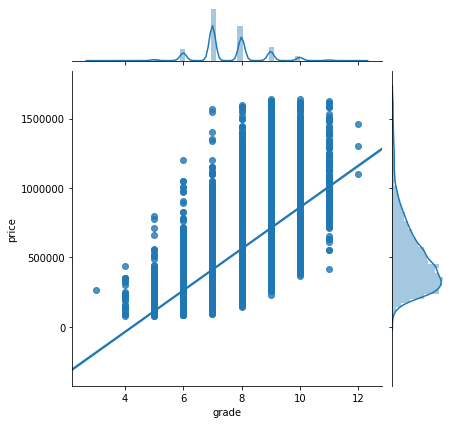

In [105]:
sns.jointplot(df['grade'], 'price', data=df, kind='reg')

The value of _grade_ can be further explored by its impact on _price_ depending on _sqft_living_.

Especially interesting seems the plot for grade 8 and 9, where the higher prices are achieved for smaller _sqft_living_.

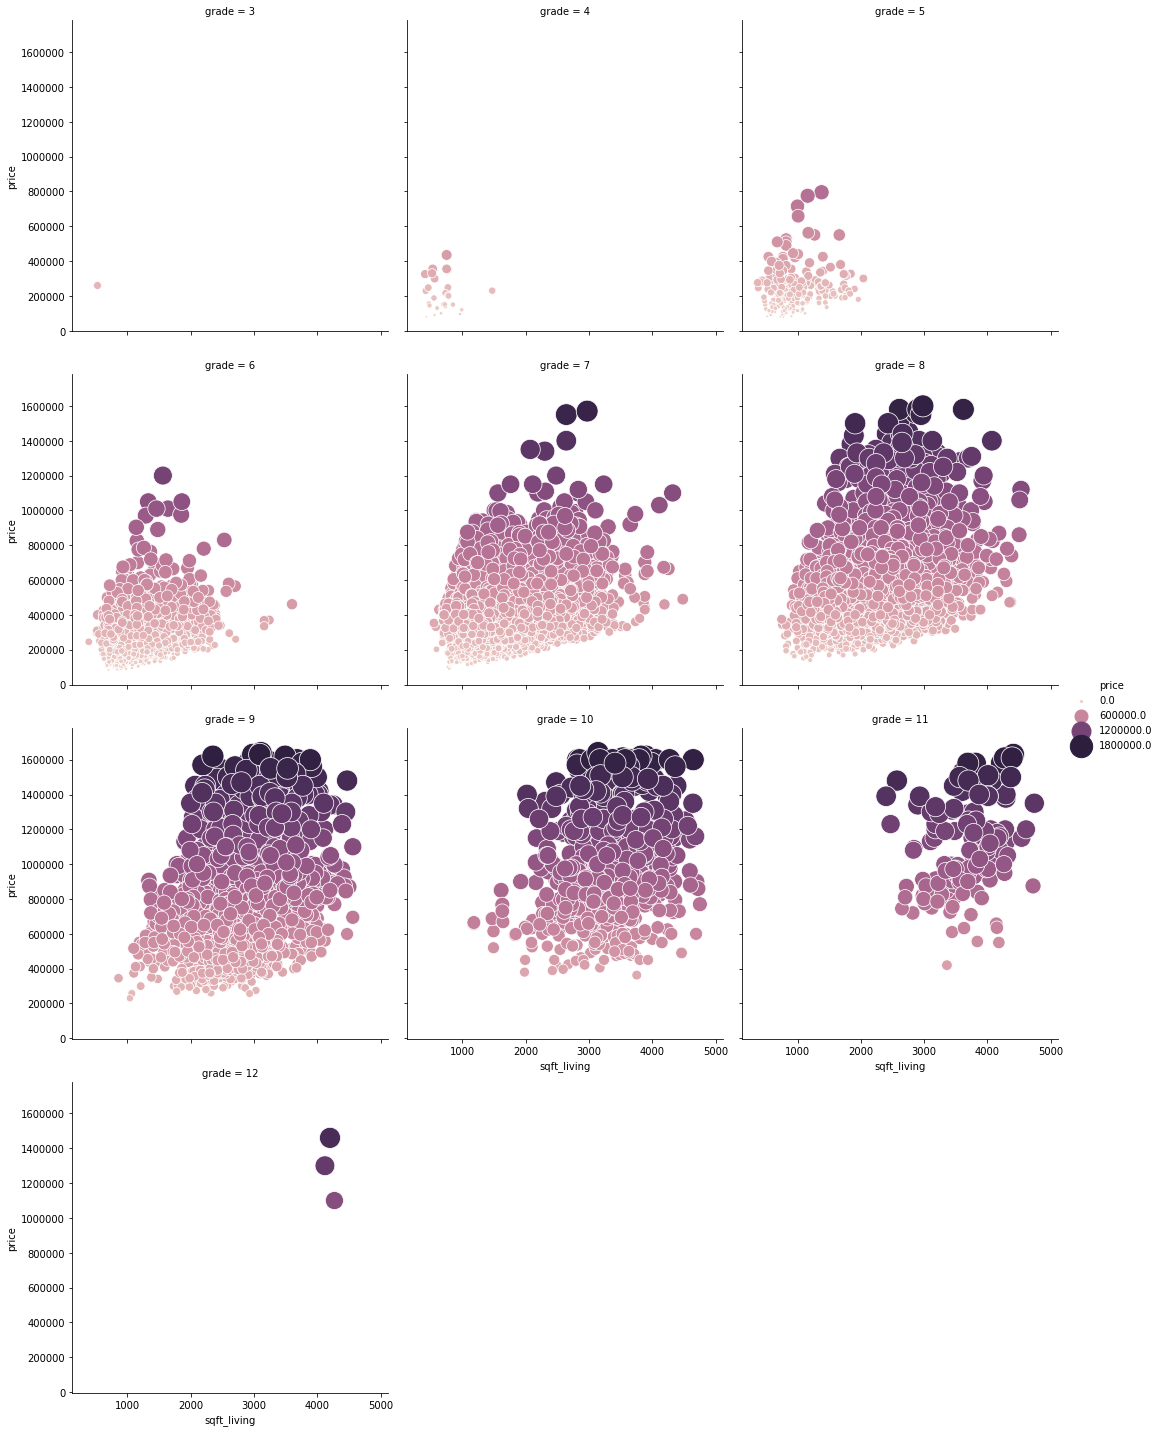

In [115]:
sns.relplot(x="sqft_living", y="price", hue="price", col="grade", 
            size="price", sizes=(5, 500), col_wrap=3, data=df)

And another overview of _grade_ on _price_. Which shows a clear strong impact from grade 6 to 12. The difference between grades 4 and 5 seems to have less impact on the price.

(-0.5, 9.5, 5000, 2000000)

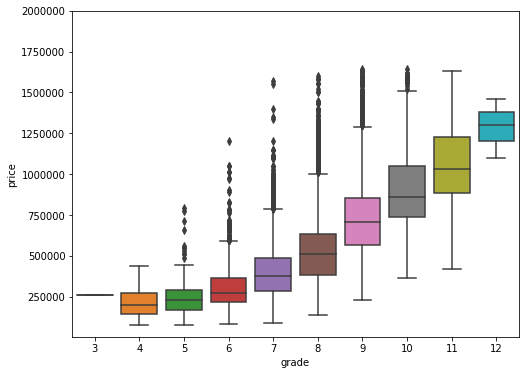

In [124]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='price', data=df)
fig.axis(ymin=5000, ymax=2000000)

_Condition_ on the other hand seems to be less relevant for the price:

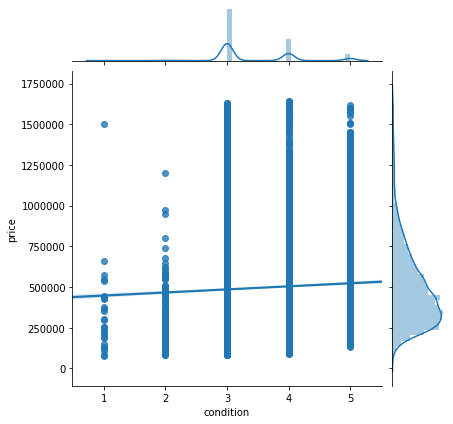

In [116]:
sns.jointplot(df['condition'], 'price', data=df, kind='reg')

Although generally unimpressive, the values in _condition 4_ are rather interesting and indicate a relatively high prices for lower _sqft_living_:

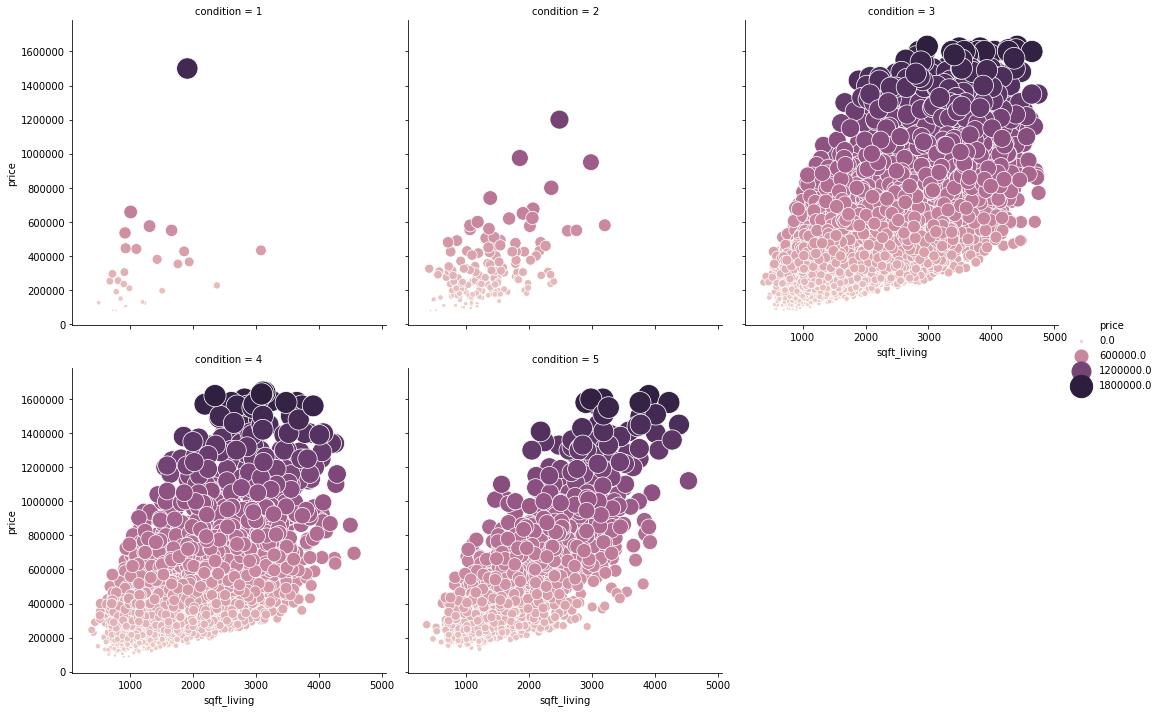

In [118]:
sns.relplot(x="sqft_living", y="price", hue="price", col="condition", 
            size="price", sizes=(5, 500), col_wrap=3, data=df)

The amount of bedrooms has an expected relation to the price. While the step from 3 to 4 bedrooms is especially impactful:

(-0.5, 5.5, 5000, 2000000)

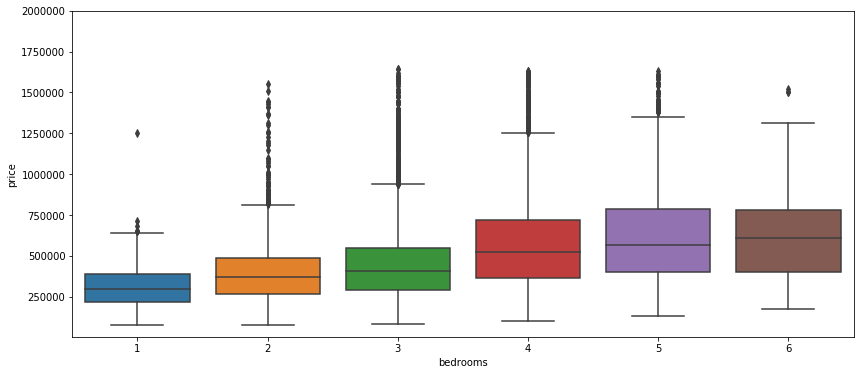

In [125]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=df)
fig.axis(ymin=5000, ymax=2000000)

_yr_built_ against _price_ provides an interesting insight, that the older and 'younger' buildings are relatively more expensive, when compared to 'middle age' constructions (ca. 1940's to 1980's) . 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

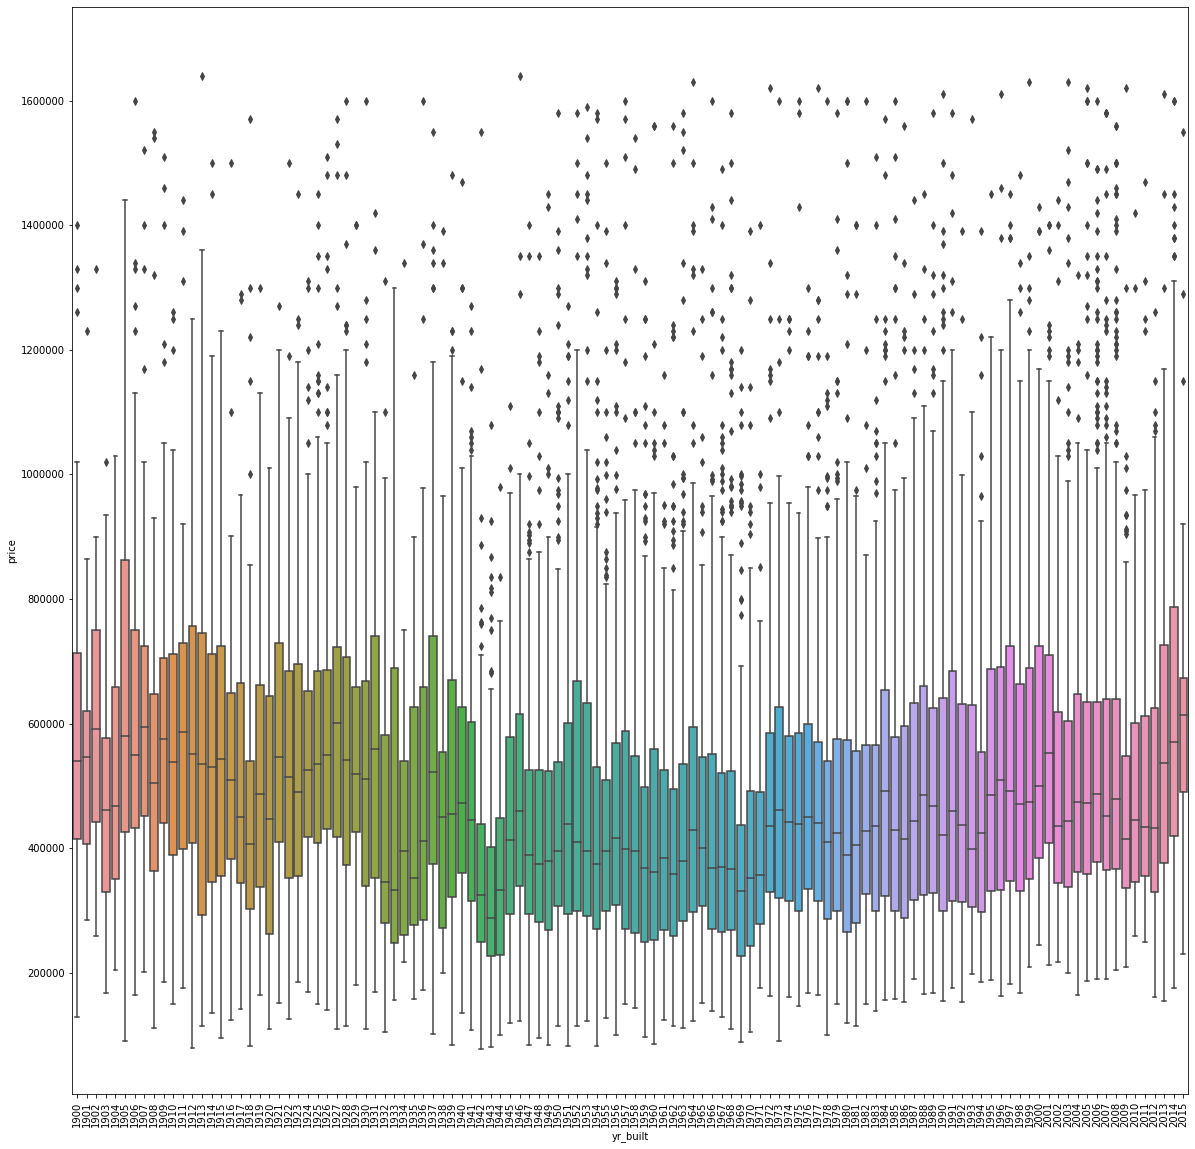

In [127]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y='price', data=df)
fig.axis(ymin=5000, ymax=1750000)
plt.xticks(rotation=90)
# The price of older and newer buildings is higher than those in the middle

## FEATURE ENGINEERING
#### (Selecting important features and constructing more meaningful ones using the raw data)

Here we'll attempt to generate an additional variables _yr_since_renovation_ and _is_renovated_.

First we define the _cur_year_

In [128]:
cur_year = datetime.datetime.now().year

Then we define a function _calc_years_ as the difference between the current year and the year it was renovated:

In [131]:
def calc_years(row):
    return cur_year - row['yr_renovated'] if row['yr_renovated'] > 0 else 0

Next we define _set_renovated_ as 1 for renovated locations and for those where the _sqft_living_ was increased in 2015 compared to the sale date.

In [132]:
def set_renovated(row):
    return 1 if row['yr_since_renovation'] > 0 or row['sqft_living'] != row['sqft_living15'] else 0

We subsequently initiate our _yr_function_ and convert it to intengers:

In [136]:
df.yr_renovated.fillna(0, inplace = True)
df.yr_renovated = df.yr_renovated.astype('int64')

... and apply apply it to our dataframe

In [139]:
df['yr_since_renovation'] = df.apply(calc_years, axis = 1)

Next we apply _set_renovated_ and create a category _set_renovated_:

In [140]:
df['is_renovated'] = df.apply(set_renovated, axis=1)

As it turns out, according to our definition there are quite a few flats that have been renovated:

In [142]:
df['is_renovated'].value_counts()

1    17809
0    2436 
Name: is_renovated, dtype: int64

We can further create categories for when and if a renovation took place:

In [143]:
bins = [0., 1950., 1980., 1990., 2000., 2015.]
names = ['never', 'before 1980', '1980-1989', '1990-1999', '2000-2015']
df['yr_renov_bins'] = pd.cut(df['yr_renovated'], bins, labels=names, right=False)
df.yr_renov_bins.fillna('never', inplace=True)

Since we have extracted all the necessary information, we can drop the _yr_renovated_ column:

In [145]:
df.drop(columns=['yr_renovated'], inplace=True)

Some check-ups on our _yr_built_ variable:

In [148]:
df.yr_built.shape

(20245,)

In [149]:
df_m.yr_built.value_counts()

2014    523
2005    417
2006    402
1977    393
2003    392
       ... 
1901    27 
1902    25 
1933    22 
1935    22 
1934    19 
Name: yr_built, Length: 116, dtype: int64

In a similar manner we can convert _yr_built_ in house_age for the sake of simplicity:

In [151]:
df['house_age'] = cur_year - df.yr_built

... and drop the obsolete variable:

In [152]:
df.drop(columns=['yr_built'], inplace=True)

Some cross-check:

In [153]:
df.house_age.value_counts()

6      523
15     417
14     402
43     393
17     392
      ... 
119    27 
118    25 
87     22 
85     22 
86     19 
Name: house_age, Length: 116, dtype: int64

### ...and some more magic

Let's categorize our houses in _old_ (older than 50 years), _modern_ (younger than 15 years), and _middle-aged_ (for those in between).

To do this we create a new variable...

In [154]:
df['yr_built_cat'] = df['house_age'].apply(lambda x: ('old' if x >= 50 else 'middle-aged') if x >= 15 else 'modern')

... and turn it into a category:

In [155]:
df['yr_built_cat'] = pd.Categorical(df['yr_built_cat'], categories = ['old', 'middle-aged', 'modern'])

Double-check if it worked:

In [159]:
df.head(1)

id        date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014 221900  3        1           1180         5650       

   waterfront  floors  view  ...  sqft_living15  sqft_lot15  zipcode  lat  \
0 0           1       0      ...  1340           5650        98178   48     

   long  yr_since_renovation  is_renovated  yr_renov_bins  house_age  \
0 -122   0                    1             never          65          

   yr_built_cat  
0  old           

[1 rows x 23 columns]

In [161]:
df.yr_built_cat.value_counts()

old            9770
middle-aged    7968
modern         2507
Name: yr_built_cat, dtype: int64

In [162]:
df.shape

(20245, 23)

Next we'd like to analyse our new variables and zipcode, i.e. its relation to price. To do that, we firstly transfer our _zipcode_ variable to an intenger:

In [171]:
df['zipcode'] = df['zipcode'].astype(int)

And use some fancy way to plot _yr_since_renovation_, _house_age_, and _zipcode_ versus _price_:

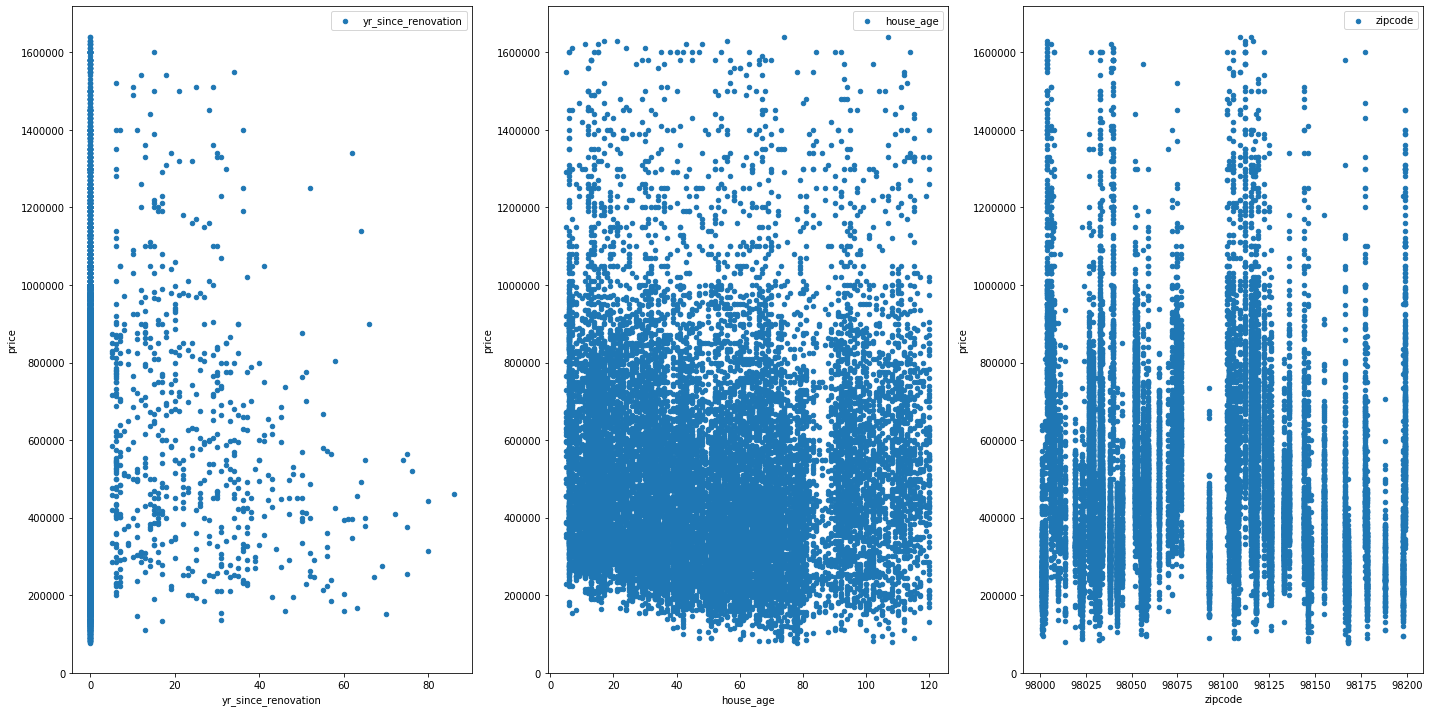

In [173]:
cols = ['yr_since_renovation', 'house_age', 'zipcode']

ncol = 3
nrow = 1
fig, axarr = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 10))

for i in range(len(cols)):
    ix = np.unravel_index(i, axarr.shape)

    name = cols[i]
    df.plot(kind='scatter', x=name, y='price', ax=axarr[ix], label=name) 

plt.tight_layout()
plt.show()

From the above we can discern:

1. Newly renovated houses are likely to be more expensive
2. As previously observe on the _yr_built_ variable, _house_age_ exhibits an u-shaped relation to _price_ , and
3. Zipcode-area around 98125 is higher priced

Now we, finally, come to our _is_renovated_ feature and plote it against the _price_. From the below graph it may be argued that (rather unsurprisingly) renovated houses are more expensive:

In [183]:
df.is_renovated.value_counts()

1    17809
0    2436 
Name: is_renovated, dtype: int64

Text(-21.324999999999996, 0.5, 'Price')

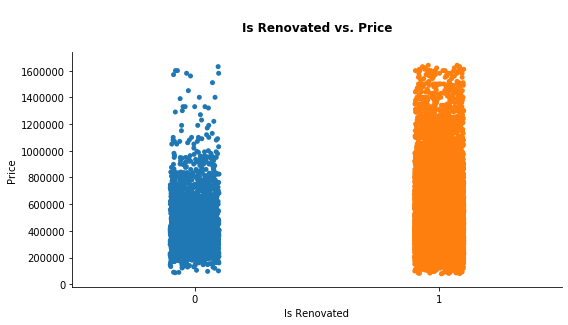

In [177]:
sns.catplot(x="is_renovated", y="price", data=df, height=4, aspect=2)
plt.title('\nIs Renovated vs. Price\n', fontweight='bold')
plt.xlabel('Is Renovated')
plt.ylabel('Price')

This conclusion is confirmed when the above in interpolated on _sqft_living15_.
The renovated houses are more expensive through the entire range of _sqft_living15_, esp. from about 1,500 to 4,000 square foot.

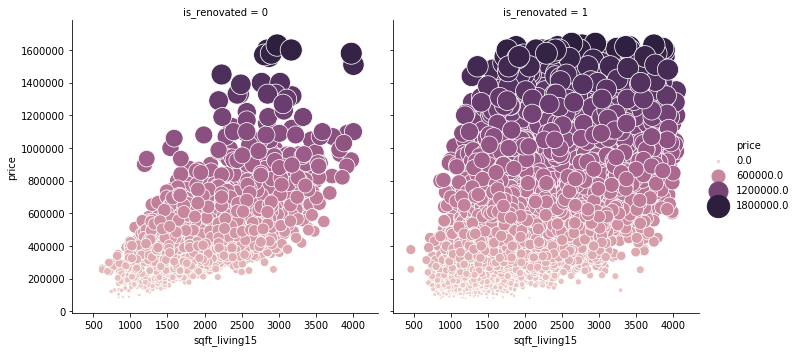

In [181]:
sns.relplot(x="sqft_living15", y="price", hue="price", col="is_renovated",size="price", sizes=(5, 500), col_wrap=2, data=df)
# looks like renovation will affect price

Now we'll take a closer look on our _is_renovated_ and _not_renovated_ variables and especially its median price value:

In [206]:
df_is_renovated = df[df['is_renovated'] == 1.0]
df_not_renovated = df[df['is_renovated'] == 0.0]

In [207]:
is_renovated_descriptives.price.median()

379536.5

In [208]:
not_renovated_descriptives.price.median()

357500.0

The median price difference between _renovated_ and _not_renovated_ is rather unspectacular:

In [209]:
is_renovated_descriptives.price.median() - not_renovated_descriptives.price.median()

22036.5

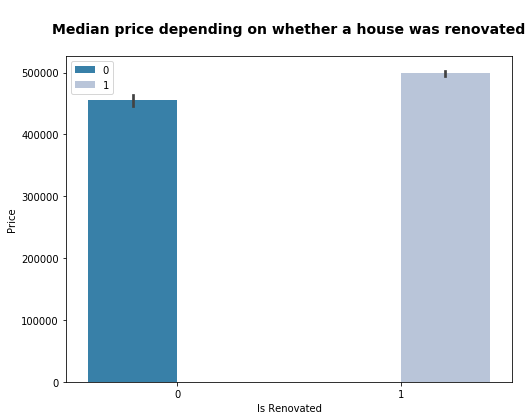

In [221]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='is_renovated', y='price', hue='is_renovated', data=df, palette="PuBu_r")
ax.set_title('\nMedian price depending on whether a house was renovated\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Price', xlabel='Is Renovated')
ax.legend(loc=2)

We can also plot our house-age categories by condition against the price.
As can be seen from the below chart, modern houses in the category no. 3 are considerably higher:

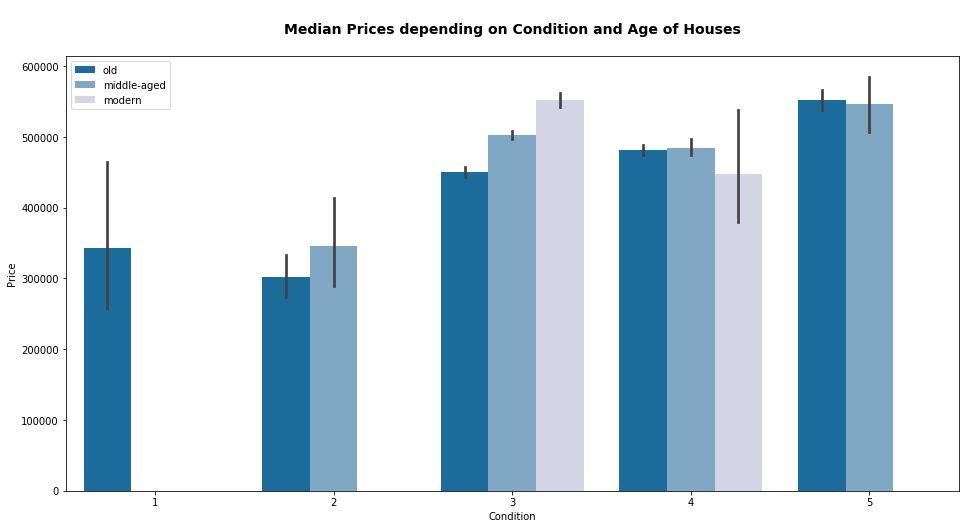

In [222]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='condition', y='price', hue='yr_built_cat', data=df, palette="PuBu_r")
ax.set_title('\nMedian Prices depending on Condition and Age of Houses\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Price', xlabel='Condition')
ax.legend(loc=2)

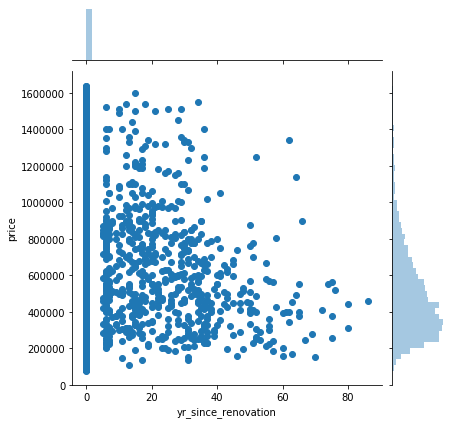

In [227]:
sns.jointplot(df['yr_since_renovation'], 'price', data=df)

## PREDICTIVE MODEL

In [228]:
model = 'price ~ sqft_living + grade + lat + is_renovated'
results = smf.ols(formula=model, data=df).fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     7500.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:12:50   Log-Likelihood:            -2.7077e+05
No. Observations:               20245   AIC:                         5.416e+05
Df Residuals:                   20240   BIC:                         5.416e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.054e+07   3.77e+05    -81.083      0.000   -3.13e+07   -2.98e+07
sqft_living    122.9729      2.097     58.651      0.000     118.863     127.083
grade         7.794e+04   1506.623     51.732      0.000     7.5e+04    8.09e+04
lat           6.345e+05   7941.997     79.888      0.000    6.19e+05     6.5e+05
is_renovated  3.228e+04   3376.925      9.558      0.000    2.57e+04    3.89e+04
==============================================================================
Omnibus:                     6020.525   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22666.515
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                       7.290   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""